Удельный расход топлива при номинальной мощности, г/кВт. ч = 208 - заявленные производителем технчиеские характеристики. Цифра показывает, сколько грамм топлива будет израсходовано двигателем за 1 час для выполнения работы, на которую нужно потратить 1 кВт мощности.
Максимальная скорость, км/ч - 43

Статистический метод позволяет определять нормы расхода топлива

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro
from scipy.stats import pearsonr

sns.set()

df = pd.read_excel('db.xlsx')
df.head()

,Дата для смены,Месяц,Смена,Самосвал,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
0,2022-10-01,10,1,1035,228.500000,25.99,17.731667,152.283333,66.851789,575.0
1,2022-10-01,10,1,1037,214.818182,80.42,17.938182,125.609091,48.356601,1795.0
2,2022-10-01,10,1,1039,221.533333,73.36,16.754000,179.664286,70.469738,1688.0
3,2022-10-01,10,1,1040,229.466667,94.95,16.555333,NaN,NaN,1865.0
4,2022-10-01,10,1,1042,NaN,60.46,NaN,77.514286,47.216396,1519.0


In [2]:
df = df.dropna()
df.head()

,Дата для смены,Месяц,Смена,Самосвал,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
0,2022-10-01,10,1,1035,228.500000,25.99,17.731667,152.283333,66.851789,575.0
1,2022-10-01,10,1,1037,214.818182,80.42,17.938182,125.609091,48.356601,1795.0
2,2022-10-01,10,1,1039,221.533333,73.36,16.754000,179.664286,70.469738,1688.0
5,2022-10-01,10,1,1043,223.800000,95.28,18.466000,242.033333,5.008802,2181.0
7,2022-10-01,10,1,1345,222.625000,58.23,19.187500,111.506250,35.030529,1414.0


этот график (рассеяния) показывает взаимосвязь между двумя переменными

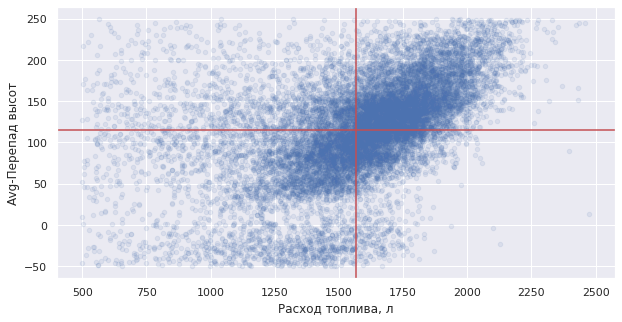

0.4771752208061695


In [3]:
df.plot(x='Расход топлива, л', y='Avg-Перепад высот', kind='scatter', alpha=0.1, figsize=[10,5])

mean_x = df['Расход топлива, л'].mean()
mean_y = df['Avg-Перепад высот'].mean()
plt.axhline(mean_y, color='r')
plt.axvline(mean_x, color='r')
plt.show()

corr, p_value = pearsonr(df['Расход топлива, л'], df['Avg-Перепад высот'])
print(corr)

более плотное скопление точек в диапазоне 1500-1900 л показывает наличие взаимосвязи между показателями

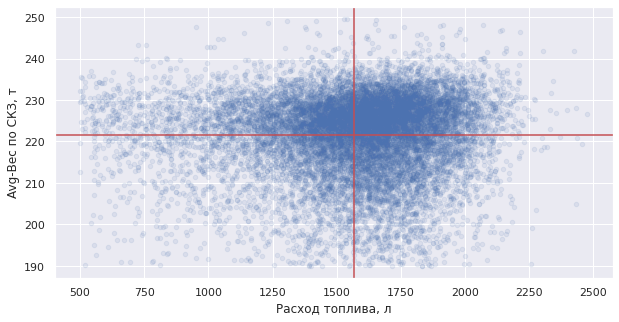

0.03580358296448112


In [4]:
df.plot(x='Расход топлива, л', y='Avg-Вес по СКЗ, т', kind='scatter', alpha=0.1, figsize=[10,5])

mean_x = df['Расход топлива, л'].mean()
mean_y = df['Avg-Вес по СКЗ, т'].mean()
plt.axhline(mean_y, color='r')
plt.axvline(mean_x, color='r')
plt.show()

corr, p_value = pearsonr(df['Расход топлива, л'], df['Avg-Вес по СКЗ, т'])
print(corr)

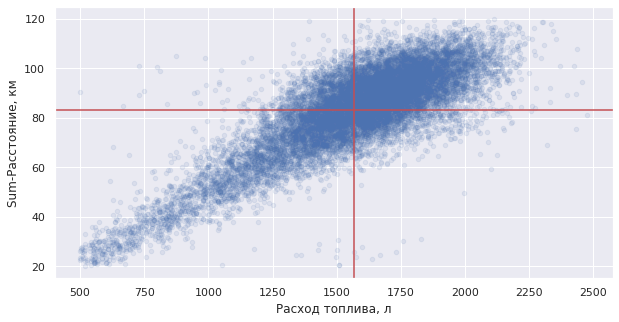

In [5]:
df.plot(x='Расход топлива, л', y='Sum-Расстояние, км', kind='scatter', alpha=0.1, figsize=[10,5])

mean_x = df['Расход топлива, л'].mean()
mean_y = df['Sum-Расстояние, км'].mean()
plt.axhline(mean_y, color='r')
plt.axvline(mean_x, color='r')
plt.show()

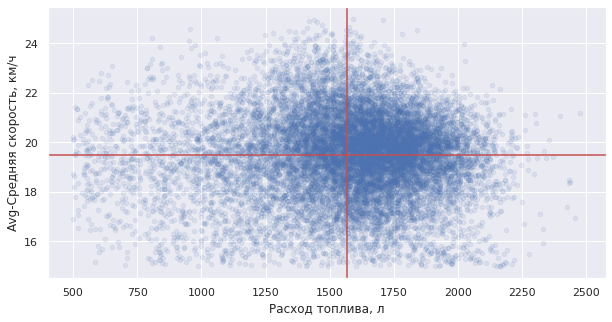

In [6]:
df.plot(x='Расход топлива, л', y='Avg-Средняя скорость, км/ч', kind='scatter', alpha=0.1, figsize=[10,5])

mean_x = df['Расход топлива, л'].mean()
mean_y = df['Avg-Средняя скорость, км/ч'].mean()
plt.axhline(mean_y, color='r')
plt.axvline(mean_x, color='r')
plt.show()

In [7]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(df['Расход топлива, л'], df['Avg-Средняя скорость, км/ч'])
print('Коэффициент Спирмена: ', corr)
print('p-value: ', p_value)

Коэффициент Спирмена:  -0.02559852450478953
p-value:  0.0015394605967700193


коэффициент Спирмена может принимать значения от -1 до 1. Значение -1 указывает на полностью обратную корреляцию, а значение 1 - на полностью прямую корреляцию. Значения, близкие к 0, указывают на отсутствие корреляции между переменными.
p-value является мерой статистической значимости связи между переменными. Если p-value меньше заданного уровня значимости (обычно 0,05), мы можем отклонить гипотезу о том, что связь между переменными случайна. Если p-value больше уровня значимости, мы не можем отклонить эту гипотезу.

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

y = df['Расход топлива, л']
x = df[['Sum-Расстояние, км', 'Avg-Средняя скорость, км/ч', 'Avg-Вес по СКЗ, т', 'Avg-Перепад высот']]

x = sm.add_constant(x)
model = sm.OLS(y, x).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Расход топлива, л   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                 1.967e+04
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:25:07   Log-Likelihood:                -95276.
No. Observations:               15305   AIC:                         1.906e+05
Df Residuals:                   15300   BIC:                         1.906e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

будем использовать функцию OLS() из библиотеки statsmodels для выполнения обычной регрессии методом наименьших квадратов, используя пройденное расстояние в качестве переменной-предиктора (независимая переменная) и расход топлива в качестве переменной ответа

Коэффициент детерминации (R-squared) равен 0.837, что означает, что около 83.7% изменчивости расхода топлива могут быть объяснены изменениями в рассматриваемых параметрах. F-статистика (F-statistic) имеет значение 1.967e+04, а вероятность (Prob (F-statistic)) меньше 0.05, что указывает на значимость модели.
Каждый параметр имеет свой коэффициент (coef), который показывает, как изменение в данном параметре влияет на изменение расхода топлива. Например, каждый километр (Sum-Расстояние, км) увеличивает расход топлива на 15.6 литров. В то же время, увеличение средней скорости на 1 км/ч (Avg-Средняя скорость, км/ч) уменьшает расход топлива на 53.867 литров. Также каждый тонну веса по СКЗ (Avg-Вес по СКЗ, т) увеличивает расход топлива на 1.1633 литров, а каждый метр перепада высот (Avg-Перепад высот) увеличивает расход топлива на 1.0608 литров.
Стандартная ошибка (std err) и t-статистика (t) используются для оценки значимости коэффициента. P-value (P>|t|) также указывает на значимость коэффициента: если значение P-value меньше 0.05, то коэффициент является значимым. 95% доверительный интервал для каждого коэффициента также указан в таблице, где [0.025, 0.975] являются нижней и верхней границей соответственно.
[1] Стандартные ошибки предполагают, что матрица ковариации ошибок правильно задана.
[2] Значение числа условия большое, 7,31е+03. Это может указывать на наличие сильной мультиколлинеарности или других численных проблем.

const - значение коэффициента при константе (т.е. свободном члене) в модели регрессии. В данном случае, это означает, что когда все предикторы равны нулю, средний расход топлива будет составлять 943.5906 л/100 км

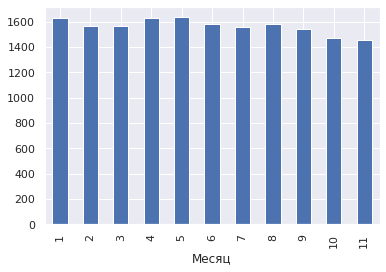

In [9]:
grouped_month = df.groupby(df['Месяц'])['Расход топлива, л']

grouped_month.mean().plot(kind='bar')
plt.show()


In [10]:
#grouped_month['Расход топлива, л'].mean()


распределение в целом равномерное. 
небольшое снижение расхода топлива в октябре и ноябре

ГИПОТЕЗЫ
H0: средний расход топлива в месяц примерно одинаков
H1: средний расход топлива в месяц различается

In [11]:
def rand_sample(data, size):
    return data.sample(n=size)

In [12]:
#import scipy.stats as st

#jan = grouped_month['Месяц'] == 1
#jan.head()

#sample1_avg_weight = rand_sample(grouped_month, 30)
#sample2_avg_weight = rand_sample(grouped_month, 30)

#t_statistic, p_value = ttest_ind(sample1_avg_weight, sample2_avg_weight)

#print("t-статистика:", t_statistic)
#print("p-значение:", p_value)




#sample1_avg_weight = rand_sample(avg_weight, 30)
#sample2_avg_weight = rand_sample(avg_weight, 30)

#t_statistic, p_value = st.ttest_ind(sample1_avg_weight, sample2_avg_weight)

#print("t-статистика:", t_statistic)
#print("p-значение:", p_value)
#alpha = 0.05
#if (p_value < alpha):
#    print("Отвергаем нулевую гипотезу")
#else:
#    print("Принимаем нулевую гипотезу")

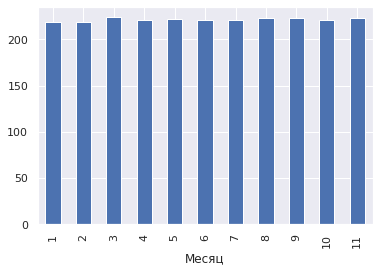

In [13]:
grouped_weight = df.groupby(df['Месяц'])['Avg-Вес по СКЗ, т'].mean()

grouped_weight.plot(kind='bar')
plt.show()

при этом средний вес по месяцам распределен равномерно, посмотрим, может быть в октябре-ноябре Белазы проезжали меньшее расстояние за смену

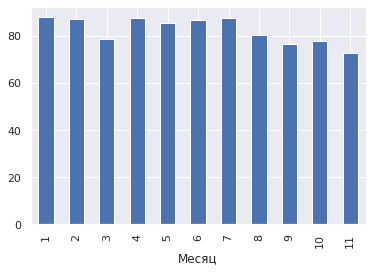

In [14]:
grouped_dist = df.groupby(df['Месяц'])['Sum-Расстояние, км'].mean()

grouped_dist.plot(kind='bar')
plt.show()

так и есть, при этом мы видим, что в марте пройденное расстояние за смену примерно соответствует октябрю, однако явного снижения расхода топлива в марте мы не наблюдаем. 

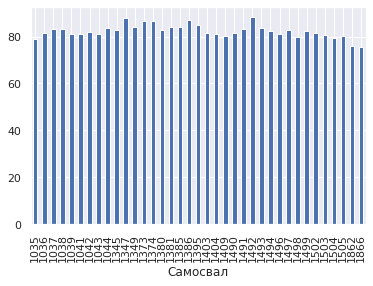

In [15]:
grouped_car = df.groupby(df['Самосвал'])['Sum-Расстояние, км'].mean()

grouped_car.plot(kind='bar')
plt.show()

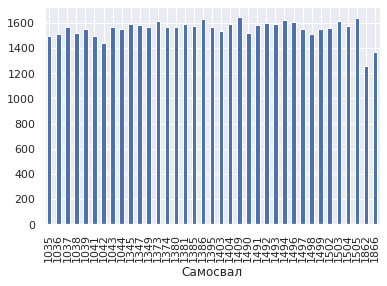

In [16]:
grouped_car_fuel = df.groupby(df['Самосвал'])['Расход топлива, л'].mean()

grouped_car_fuel.plot(kind='bar')
plt.show()

! проверить на


распределение в целом равномерное, однако очень заметно выделяются самосвалы 1862 и 1866

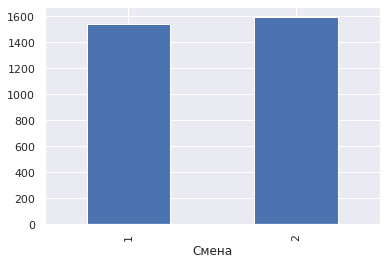

In [17]:
grouped_shift = df.groupby(df['Смена'])['Расход топлива, л'].mean()

grouped_shift.plot(kind='bar')
plt.show()

изменение расхода топлива в зависимости от смены не выявлено

хочется более подробно изучить распределение топлива

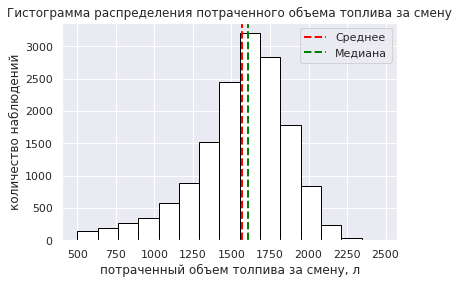

1608.0


In [18]:
fuel = df['Расход топлива, л'].dropna()
plt.hist(fuel, bins=15, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('потраченный объем толпива за смену, л')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения потраченного объема топлива за смену')
plt.axvline(fuel.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(fuel.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.legend()

plt.show()
print(fuel.median())

медианное значение расхода топлива = 1 608 л за смену

попробуем сгруппировать наши данные 

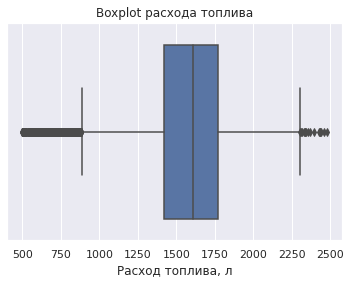

In [19]:
plt.figure(facecolor='white')
sns.boxplot(x=fuel)
plt.xlabel('Расход топлива, л')
plt.title('Boxplot расхода топлива')

plt.show()

график показывает явное наличие выбросов - это слишком маленькие или слишком большие значения нашего показателя. попробуем избавиться от выбросов.

In [20]:
def del_outliers(data):
    #посчитаю межквартильный размах: определю первый и третий квантили данных 
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    # определю границы выбросов: выбросы находятся на расстоянии 1,5 межквартильных рахмаха
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    res = data[(data >= lower_limit) & (data <= upper_limit)]
    return res

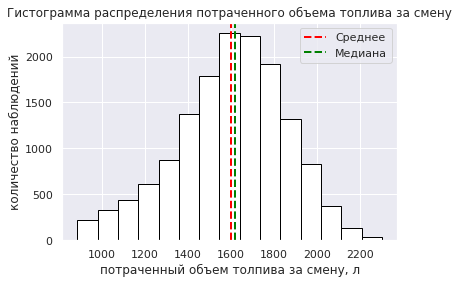

1620.0


In [21]:
plt.hist(del_outliers(df['Расход топлива, л']), bins=15, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('потраченный объем толпива за смену, л')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения потраченного объема топлива за смену')
plt.axvline(del_outliers(df['Расход топлива, л']).mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(del_outliers(df['Расход топлива, л']).median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.legend()

plt.show()
print(del_outliers(df['Расход топлива, л']).median())

<Axes: >

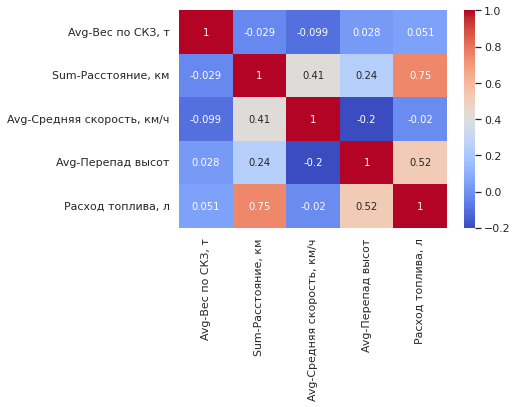

In [22]:
d_filt = del_outliers(df[['Avg-Вес по СКЗ, т', 'Sum-Расстояние, км', 'Avg-Средняя скорость, км/ч', 'Avg-Перепад высот', 'Расход топлива, л']])
corr_filt = d_filt.corr()
sns.heatmap(corr_filt, annot=True, cmap='coolwarm')
#plt.savefig('/home/anya-mankova/emco/images/corr.png', dpi=80)

после удаления выбросов корреляция между признаками в целом не изменилась

In [23]:
d = {'Характеристика': pd.Series(['Средний вес, т', 'Среднее расстояние, км', 'Средняя скорость, км/ч', 'Средний перепад высот', 'Средний расход топлива']),
     'С выбросами': pd.Series([df['Avg-Вес по СКЗ, т'].mean(), df['Sum-Расстояние, км'].mean(), df['Avg-Средняя скорость, км/ч'].mean(), df['Avg-Перепад высот'].mean(), df['Расход топлива, л'].mean()]),
     'Без выбросов': pd.Series([d_filt['Avg-Вес по СКЗ, т'].mean(), d_filt['Sum-Расстояние, км'].mean(), d_filt['Avg-Средняя скорость, км/ч'].mean(), d_filt['Avg-Перепад высот'].mean(), d_filt['Расход топлива, л'].mean()])
}         

diff_df = pd.DataFrame(d)
diff_df

,Характеристика,С выбросами,Без выбросов
0,"Средний вес, т",221.621772,222.459261
1,"Среднее расстояние, км",82.892749,84.976735
2,"Средняя скорость, км/ч",19.485603,19.484160
3,Средний перепад высот,114.736675,119.784553
4,Средний расход топлива,1566.611696,1598.529284


поскольку мы видим наличие линейной связи между расходом топлива, пройденным расстоянием и перепадом высот, то применять метод линейной регрессии мы можем только к этим параметрам:

In [24]:
d_filt = d_filt.dropna()
y = d_filt['Расход топлива, л']
x = d_filt[['Sum-Расстояние, км', 'Avg-Перепад высот']]

x = sm.add_constant(x)
model = sm.OLS(y, x).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Расход топлива, л   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                 1.629e+04
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:25:09   Log-Likelihood:                -85359.
No. Observations:               13519   AIC:                         1.707e+05
Df Residuals:                   13516   BIC:                         1.707e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                406.7269      7

Значение R-squared 0.793 означает, что 79.3% вариации зависимой переменной может быть объяснено независимыми переменными. 
Значение F-статистики  1.296e+04 говорит нам, что модель значима.
Значение Prob (F-статистики) 0.00 указывает на то, что вероятность получения такого или большего значения F-статистики при условии, что все коэффициенты регрессии равны нулю, крайне мала.
Значение Log-Likelihood (логарифмическое правдоподобие) -82999 указывает на логарифмическое правдоподобие модели - мера качества модели.
В целом, эти данные указывают на то, что регрессионная модель является значимой и может объяснить большую часть вариации зависимой переменной.
Первая строка соответствует константе (intercept), которая показывает ожидаемое значение зависимой переменной, когда все независимые переменные равны нулю. Остальные строки соответствуют наклону (slope) регрессионной прямой для каждой из независимых переменных.
коэффициенты каждого параметра указывают на то, как каждый из параметров влияет на изменение независимой переменной:
- каждый километр расстояния увеличивает расход топлива на 14.8410 л; 
- если средняя скорость увеличивается на 1 км/ч то расход топлива уменьшается на 53 л;
- если перевозимый вес в кузове увеличивается на 1 т, то расход топлива увеличивается на 1,2 л;
- если перепад высот увеличивается, расход топлива также увеличивается на 1,2 л.
Omnibus: это статистический тест, который проверяет, насколько хорошо остатки регрессии распределены нормально. Значение 820.438 является результатом этого теста и чем меньше оно, тем лучше. Значение Prob(Omnibus) показывает вероятность того, что остатки распределены нормально. Значение 0.000 говорит о том, что это вероятность крайне мала
Durbin-Watson: это тест на автокорреляцию остатков. Значение 1.639 показывает, что автокорреляция слабая
Jarque-Bera (JB): это еще один тест на нормальность остатков. Значение 3715.683 является результатом теста, и чем больше оно, тем хуже. Значение Prob(JB) показывает вероятность того, что остатки распределены нормально. Значение 0.00 говорит о том, что это вероятность крайне мала
Skew: это коэффициент асимметрии остатков. Значение -0.006 говорит о том, что распределение остатков близко к нормальному.
Kurtosis: это коэффициент эксцесса остатков. Значение 5.568 говорит о том, что остатки имеют некоторую степень "островершинности".
Cond. No.: это номер условия, который оценивает степень мультиколлинеарности между предикторами. Значение 8.4e+03 (8400) показывает, что есть некоторая степень мультиколлинеарности, но она не слишком высока.

In [ ]:
Первая гипотеза
H0 - изменение скорости самосвала не влияет на изменение расхода топлива
H1 - изменение скорости самосвала влияет на изменение расхода топлива

для начала проранжируем наши признаки скорости от низкой до высокой. 
интервалы: 
    15-18,3 - низкая
    18,4-18,99 - ниже среднего
    19-20 - средняя
    21-20,5 - выше среднего
    20,6-25 - высокая

In [ ]:
df_new = df[['Расход топлива, л', 'Avg-Вес по СКЗ, т', 'Avg-Средняя скорость, км/ч']]

for i, row in df.iterrows():
    if 15 <= row['Avg-Средняя скорость, км/ч'] <= 18.3:
        df_new.at[i, 'оценка скорости'] = 'низкая скорость'
    elif 18.3 < row['Avg-Средняя скорость, км/ч'] < 19:
        df_new.at[i, 'оценка скорости'] = 'скорость ниже среднего'
    elif 19 <= row['Avg-Средняя скорость, км/ч'] <= 20:
        df_new.at[i, 'оценка скорости'] = 'средняя скорость'
    elif 20 < row['Avg-Средняя скорость, км/ч'] <= 20.5:
        df_new.at[i, 'оценка скорости'] = 'скорость выше среднего'
    else:
        df_new.at[i, 'оценка скорости'] = 'высокая скорость'

for i, row in df.iterrows():
    if 190 <= row['Avg-Вес по СКЗ, т'] <= 216.5:
        df_new.at[i, 'оценка весов'] = 'малый вес'
    elif 216.5 < row['Avg-Вес по СКЗ, т'] < 220:
        df_new.at[i, 'оценка весов'] = 'вес ниже среднего'
    elif 220 <= row['Avg-Вес по СКЗ, т'] <= 223.4:
        df_new.at[i, 'оценка весов'] = 'средний вес'    
    elif 223.4 < row['Avg-Вес по СКЗ, т'] <= 228.3:
        df_new.at[i, 'оценка весов'] = 'вес выше среднего'
    else:
        df_new.at[i, 'оценка весов'] = 'большой вес'
df_new.head()

In [ ]:
выполним анализ, чтобы определить, одинаковы ли средние значения расхода топлива для пяти групп скорости.
H0 - средние значения равны
H1 - по крайней мере одно среднее значение отличаетсяот остальных

In [ ]:
ANOVA

In [ ]:
from scipy.stats import f_oneway


group1 = rand_sample(df_new[df_new['оценка скорости']=='низкая скорость'], 50)
group2 = rand_sample(df_new[df_new['оценка скорости']=='скорость ниже среднего'], 50)
group3 = rand_sample(df_new[df_new['оценка скорости']=='средняя скорость'], 50)
group4 = rand_sample(df_new[df_new['оценка скорости']=='скорость выше среднего'], 50)
group5 = rand_sample(df_new[df_new['оценка скорости']=='высокая скорость'], 50)
sample_group1 = pd.Series(group1['Расход топлива, л'])
sample_group2 = pd.Series(group2['Расход топлива, л'])
sample_group3 = pd.Series(group3['Расход топлива, л'])
sample_group4 = pd.Series(group4['Расход топлива, л'])
sample_group5 = pd.Series(group5['Расход топлива, л'])
f_oneway(sample_group1, sample_group2, sample_group3, sample_group4, sample_group5)

In [ ]:
!!! все не так, переписать

! Поскольку p-значение НЕ меньше 0,05, мы НЕ можем отвергнуть нулевую гипотезу
это значит, что ЕСТЬ основания полагать, что скорость влияет на расход топлива.
попробуем сравнить в каких именно группах есть взаимосвязь: будем сравнивать данные при средней скорости и выше/ниже среднего

In [ ]:
f_oneway(sample_group2, sample_group3)

In [ ]:
f_oneway(sample_group4, sample_group3)

In [ ]:
speed_df = pd.DataFrame({'Выборка для скорости ниже среднего':sample_group2, 'Выборка для средней скорости':sample_group3, 'Выборка для скорости выше среднего':sample_group4}).agg(['mean','std','count','sem']).transpose()
speed_df.columns = ['mean','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = stats.t.ppf((1 + p)/2, speed_df['mean']-1)
speed_df['interval'] = K * speed_df['SE']

speed_df

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9), facecolor='white')
bplot1_truck = ax1.boxplot([sample_group2, sample_group3, sample_group4], 
                     labels=['low-avg speed',
                             'avg speed',
                             'high-avg speed'])

#график доверительных интервалов
bplot2_truck = ax2.errorbar(x=speed_df.index, y=speed_df['mean'],\
                            yerr=speed_df['interval'],\
                            color="black", capsize=3,\
                            markersize=4, mfc="red", mec="black", fmt ='o')

for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax1.set_title('Boxplot - Расход топлива в зависимости от скорости')
    ax2.set_title('Доверительный интервал - Расход топлива в зависимости от скорости')
    ax.set_xlabel('Сравнение трех выборок')
    ax.set_ylabel('Расход топлива, л')

plt.show()

мы МОЖЕМ отвергнуть нулевую гипотезу о том, что не существует различий в расходе топлива в зависимости от скорости, различия существуют!

In [ ]:
Вторая гипотеза
H0 - изменение веса не влияет на изменение расхода топлива
H1 - изменение веса влияет на изменение расхода топлива

для начала проранжируем наши признаки скорости от низкой до высокой. 
интервалы: 
    15-18,3 - низкая
    18,4-19,5 - средняя
    19,6-20,5 - выше среднего
    20,6-25 - высокая

In [ ]:
group_w1 = rand_sample(df_new[df_new['оценка весов']=='малый вес'], 50)
group_w2 = rand_sample(df_new[df_new['оценка весов']=='вес ниже среднего'], 50)
group_w3 = rand_sample(df_new[df_new['оценка весов']=='средний вес'], 50)
group_w4 = rand_sample(df_new[df_new['оценка весов']=='вес выше среднего'], 50)
group_w5 = rand_sample(df_new[df_new['оценка весов']=='большой вес'], 50)
sample_group_w1 = pd.Series(group_w1['Расход топлива, л'])
sample_group_w2 = pd.Series(group_w2['Расход топлива, л'])
sample_group_w3 = pd.Series(group_w3['Расход топлива, л'])
sample_group_w4 = pd.Series(group_w4['Расход топлива, л'])
sample_group_w5 = pd.Series(group_w5['Расход топлива, л'])

f_oneway(sample_group_w1, sample_group_w2, sample_group_w3, sample_group_w4, sample_group_w5)

In [ ]:
! Поскольку p-значение БОЛЬШЕ 0,05, мы НЕ МОЖЕМ отвергнуть нулевую теорию
это значит, чтоу нас нет достаточных оснований полагать, что вес влияет на расход топлива

попробуем сравнить по группам, возможно между конкретными группами найдем взаимосвязь: будем сравнивать данные при загрузке ниже среднего, средней и выше среднего

In [ ]:
f_oneway(sample_group_w2, sample_group_w3, sample_group_w4)

In [ ]:
f_oneway(sample_group_w2, sample_group_w3)

In [ ]:
f_oneway(sample_group_w3, sample_group_w5)

даже между минимальной и максимальной загрузкой не видно взаимосвязи

In [ ]:
weight_df = pd.DataFrame({'Выборка для малого веса':sample_group_w1, 'Выборка для веса ниже среднего':sample_group_w2, 'Выборка для среднего веса':sample_group_w3, 'Выборка для веса выше среднего':sample_group_w4, 'Выборка для большого веса':sample_group_w5}).agg(['mean','std','count','sem']).transpose()
weight_df.columns = ['mean','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = stats.t.ppf((1 + p)/2, weight_df['mean']-1)
weight_df['interval'] = K * weight_df['SE']

weight_df

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9), facecolor='white')
bplot1_truck = ax1.boxplot([sample_group_w1, sample_group_w2, sample_group_w3, sample_group_w4, sample_group_w5], 
                     labels=['low w',
                             'low-avg w',
                             'avg w',
                             'high-avg w',
                             'high w'])

#график доверительных интервалов
bplot2_truck = ax2.errorbar(x=weight_df.index, y=weight_df['mean'],\
                            yerr=weight_df['interval'],\
                            color="black", capsize=3,\
                            markersize=4, mfc="red", mec="black", fmt ='o')

for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax1.set_title('Boxplot - Расход топлива в зависимости от веса')
    ax2.set_title('Доверительный интервал - Расход топлива в зависимости от веса')
    ax.set_xlabel('Сравнение 5ти выборок')
    ax.set_ylabel('Расход топлива, л')

plt.show()

In [ ]:
в целом средние примерно равны, только во второй группе среднее уж очень выбивается, расход топлива при загрузке ниже среднего почему-то выше, чем, например при средней загрузке.

In [ ]:
low_sp = df_new[df_new['оценка скорости']=='скорость ниже среднего']
low_sp = low_sp[low_sp['оценка весов']=='вес ниже среднего']
low_sp

In [ ]:
дальше зафигачить анализ:
одинаковая скорость - разный вес
одинаковый вес - разная скорость

In [ ]:


group1_sw = df_new[[df_new['оценка скорости']=='скорость ниже среднего' and
            df_new['оценка весов']=='вес ниже среднего']]

In [ ]:

group1_sw = rand_sample(df_new[[df_new['оценка скорости']=='скорость ниже среднего' and
                               df_new['оценка весов']=='вес ниже среднего']], 10)
group2_sw = rand_sample(df_new[df_new[['оценка скорости']=='средняя скорость' and
                               df_new['оценка весов']=='вес ниже среднего']], 10)
group3_sw = rand_sample(df_new[[df_new['оценка скорости']=='скорость выше среднего' and
                               df_new['оценка весов']=='вес ниже среднего']], 10)

sample_group1_sw = pd.Series(group1_sw['Расход топлива, л'])
sample_group2_sw = pd.Series(group2_sw['Расход топлива, л'])
sample_group3_sw = pd.Series(group3_sw['Расход топлива, л'])
f_oneway(sample_group1_sw, sample_group2_sw, sample_group3_sw)

In [ ]:
group_w5.head()

In [ ]:
! и снова, p-значение не меньше 0,05, мы не можем отвергнуть нулевую теорию :(
это значит, что у нас нет достаточных доказательств, что вес явно влияет на расход топлива.

In [ ]:
как стандартизировать значения:

In [ ]:
import sklearn
from sklearn import preprocessing
avg_weight

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(np.array(avg_weight - avg_weight.mean()).reshape(-1, 1))
print(min(np_scaled))
print(max(np_scaled))

In [ ]:
построение доверительных интервалов
среднее плюс/минус 1.96 * (стандартное отклонение / корень из кол-ва наблюдений)

In [ ]:
from math import sqrt
sample_weight = avg_weight.sample(n=30)
std = np.std(sample_weight)
mean_w = sample_weight.mean()
se = std / sqrt(30)
print(se)

left_int = mean_w - 1.96 * se
rigth_int = mean_w + 1.96 * se
print(left_int, mean_w, rigth_int)

Гипотезы:

1. о существовании связи между расходом топлива и средней скоростью
2. о существовании связи между расходом топлива и пройденным расстоянием
3. о том что расход топлива в зависимости от смены не отличается
4. о том что расход топлива в зависимости от самосвала не отличается
5. о том что расход топлива в зависимости от месяца может отличаться

Для проверки гипотезы о среднем значении выборки на основе данной информации можно использовать t-тест Стьюдента. Попытаемся определить, насколько вероятно, что наши результаты отражают реальные различия в исследуемой генеральной совокупности, а не просто случайность или шум в данных.
Нулевая гипотеза - две выборки имеют одинаковые средние значения

Когда мы применяем t-тест, мы сравниваем две выборки, сравнивая их средние значения и стандартные отклонения. Тест вычисляет t-статистику, которая показывает, насколько различны средние значения выборок относительно их стандартных отклонений. Значение t-статистики сравнивается с табличным значением, определенным на основе уровня доверия и степеней свободы. Если t-статистика превышает табличное значение, то мы можем отвергнуть нулевую гипотезу и сделать вывод, что между выборками существует статистически значимое различие. Если значение t-статистики меньше табличного, то мы не можем отвергнуть нулевую гипотезу, и мы не можем сказать, что различия статистически значимы.

P-значение означает, насколько вероятно, что различия, которые мы наблюдаем в выборках, могут быть случайными. Если p-значение меньше уровня значимости, то мы можем считать, что различия статистически значимы. Если же p-значение больше уровня значимости, то мы не можем отвергнуть нулевую гипотезу, и мы не можем считать, что различия статистически значимы.

уровень значимости = 5%
уровень доверия = 95%

In [ ]:
import scipy.stats as st

sample1_avg_weight = rand_sample(avg_weight, 30)
sample2_avg_weight = rand_sample(avg_weight, 30)

t_statistic, p_value = st.ttest_ind(sample1_avg_weight, sample2_avg_weight)

print("t-статистика:", t_statistic)
print("p-значение:", p_value)
alpha = 0.05
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу")

In [ ]:
plt.figure(facecolor='white')
sns.boxplot(x=sample_avg_weight)
plt.xlabel('Средний вес, тонн')
plt.title('Boxplot среднего веса')

plt.show()

In [ ]:
avg_height = df['Avg-Перепад высот'].dropna()
print(f' Количество наблюдений {avg_height.count()}')
# 17242 строк с данными
plt.hist(avg_height, bins=20, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('средний перепад высот за смену')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения среднего перепада высот')
plt.axvline(avg_height.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(avg_height.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(avg_height.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

plt.savefig('/home/anya-mankova/emco/images/avg_height/ah_hist.png', dpi=100)
plt.show()

In [ ]:
print("Дисперсия: ", np.var(avg_height))
print("Стандартное отклонение: ", np.std(avg_height))
print("Коэффициент вариации: ", avg_height.std() / avg_height.mean())
print("Межквартильный размах: ", avg_height.quantile(0.75) - avg_height.quantile(0.25))
print()

#тест Лиллиефорса
test_stat, p_value = lilliefors(avg_height, dist='norm')
print(f'Тест Лиллиефорса: критерий = {round(test_stat, 3)}, p-val = {round(p_value, 3)}')

In [ ]:
stats.probplot(avg_height, dist="norm", plot=plt)
plt.savefig('/home/anya-mankova/emco/images/avg_height/ah_qqplot.png', dpi=50)
plt.show()

In [ ]:
plt.figure(facecolor='white')
sns.boxplot(x=avg_height)
plt.xlabel('Средний перепад высот')
plt.title('Boxplot среднего перепада высот')

plt.show()

In [ ]:
dist = df['Sum-Расстояние, км'].dropna()
print(f' Количество наблюдений {dist.count()}')
# 18552 строки с данными
plt.hist(dist, bins=20, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('пройденное расстояние суммарно за смену, км')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения пройденного расстояния (суммарно) за смену')
plt.axvline(dist.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(dist.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(dist.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

plt.savefig('/home/anya-mankova/emco/images/dist/dist_hist.png', dpi=100)
plt.show()

In [ ]:
print("Дисперсия: ", np.var(dist))
print("Стандартное отклонение: ", np.std(dist))
print("Коэффициент вариации: ", dist.std() / dist.mean())
print("Межквартильный размах: ", dist.quantile(0.75) - dist.quantile(0.25))
print()

#тест Лиллиефорса
test_stat, p_value = lilliefors(dist, dist='norm')
print(f'Тест Лиллиефорса: критерий = {round(test_stat, 3)}, p-val = {round(p_value, 3)}')

In [ ]:
stats.probplot(dist, dist="norm", plot=plt)
plt.savefig('/home/anya-mankova/emco/images/dist/dist_qqplot.png', dpi=50)
plt.show()

In [ ]:
import sklearn
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df[['Avg-Вес по СКЗ, т', 'Sum-Расстояние, км', 'Avg-Средняя скорость, км/ч', 'Avg-Перепад высот', 'StDev-Перепад высот', 'Расход топлива, л']].dropna())
df_norm = pd.DataFrame(np_scaled)
df_norm.head()